In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [133]:
df = pd.read_csv(r"D:/Coding/ML/Databases/electricity_cost_dataset.csv")
df

site area structure type  water consumption  recycling rate  \
0          1360      Mixed-use             2519.0              69   
1          4272      Mixed-use             2324.0              50   
2          3592      Mixed-use             2701.0              20   
3           966    Residential             1000.0              13   
4          4926    Residential             5990.0              23   
...         ...            ...                ...             ...   
9995        708     Commercial             1365.0              76   
9996       2960    Residential             3332.0              22   
9997       3942     Commercial             2427.0              61   
9998       3211     Commercial             4639.0              72   
9999       2837     Commercial             3124.0              50   

      utilisation rate  air qality index  issue reolution time  \
0                   52               188                     1   
1                   76               165                    65   
2                   94               198                    39   
3                   60                74                     3   
4                   65                32                    57   
...                ...               ...                   ...   
9995                77                22                    23   
9996                72               100                    47   
9997                43                48                    49   
9998                73               105                    55   
9999                57                 3                    10   

      resident count  electricity cost  
0                 72            1420.0  
1                261            3298.0  
2                117            3115.0  
3                 35            1575.0  
4                185            4301.0  
...              ...               ...  
9995               0             885.0  
9996              54            3081.0  
9997               0            3325.0  
9998               0            2892.0  
9999               0            2603.0  

[10000 rows x 9 columns]

didnt see any consistency, validity, completeness or accuracy error here.
Moving to Statistical Methods!

In [134]:
df.describe()

site area  water consumption  recycling rate  utilisation rate  \
count  10000.000000       10000.000000    10000.000000      10000.000000   
mean    2757.775100        3494.057100       49.598000         64.842200   
std     1293.059959        2076.181117       23.430141         20.432965   
min      501.000000        1000.000000       10.000000         30.000000   
25%     1624.000000        1779.000000       29.750000         47.000000   
50%     2773.500000        3047.500000       49.000000         65.000000   
75%     3874.000000        4811.000000       70.000000         83.000000   
max     5000.000000       10894.000000       90.000000        100.000000   

       air qality index  issue reolution time  resident count  \
count      10000.000000          10000.000000    10000.000000   
mean          99.468600             36.402600       85.573100   
std           58.014526             20.623905      107.876179   
min            0.000000              1.000000        0.000000   
25%           49.000000             19.000000        0.000000   
50%          100.000000             36.000000       39.000000   
75%          150.000000             54.000000      142.000000   
max          200.000000             72.000000      489.000000   

       electricity cost  
count      10000.000000  
mean        2837.845000  
std         1106.997441  
min          500.000000  
25%         1954.000000  
50%         2760.000000  
75%         3632.000000  
max         6446.000000

##resident count is rapidly increasing after 25 %ile mark, which is understandable considering the count of commercial areas!
##major difference between mean and 50% in the resident count, indication towards some areas having relatively high population difference!

##very little difference between 50% and 75% mark in the Electricity cost, indicating toward Skewness of the data!

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


<Axes: ylabel='Frequency'>

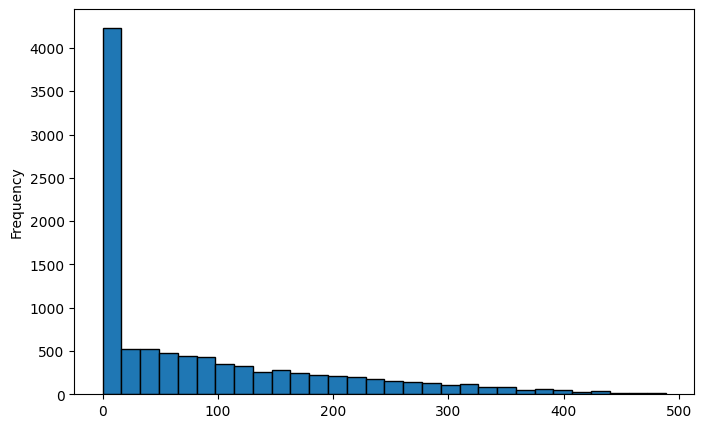

In [136]:
df['resident count'].plot(kind='hist', bins=30, edgecolor='black', figsize=(8, 5))

<Axes: ylabel='Frequency'>

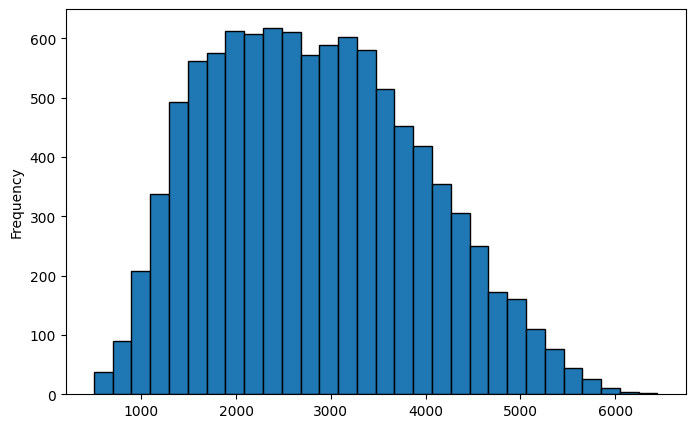

In [83]:
df['electricity cost'].plot(kind='hist', bins=30, edgecolor='black', figsize=(8, 5))

there is some element of skewness in all the columns!
therefore, we will use scaling...

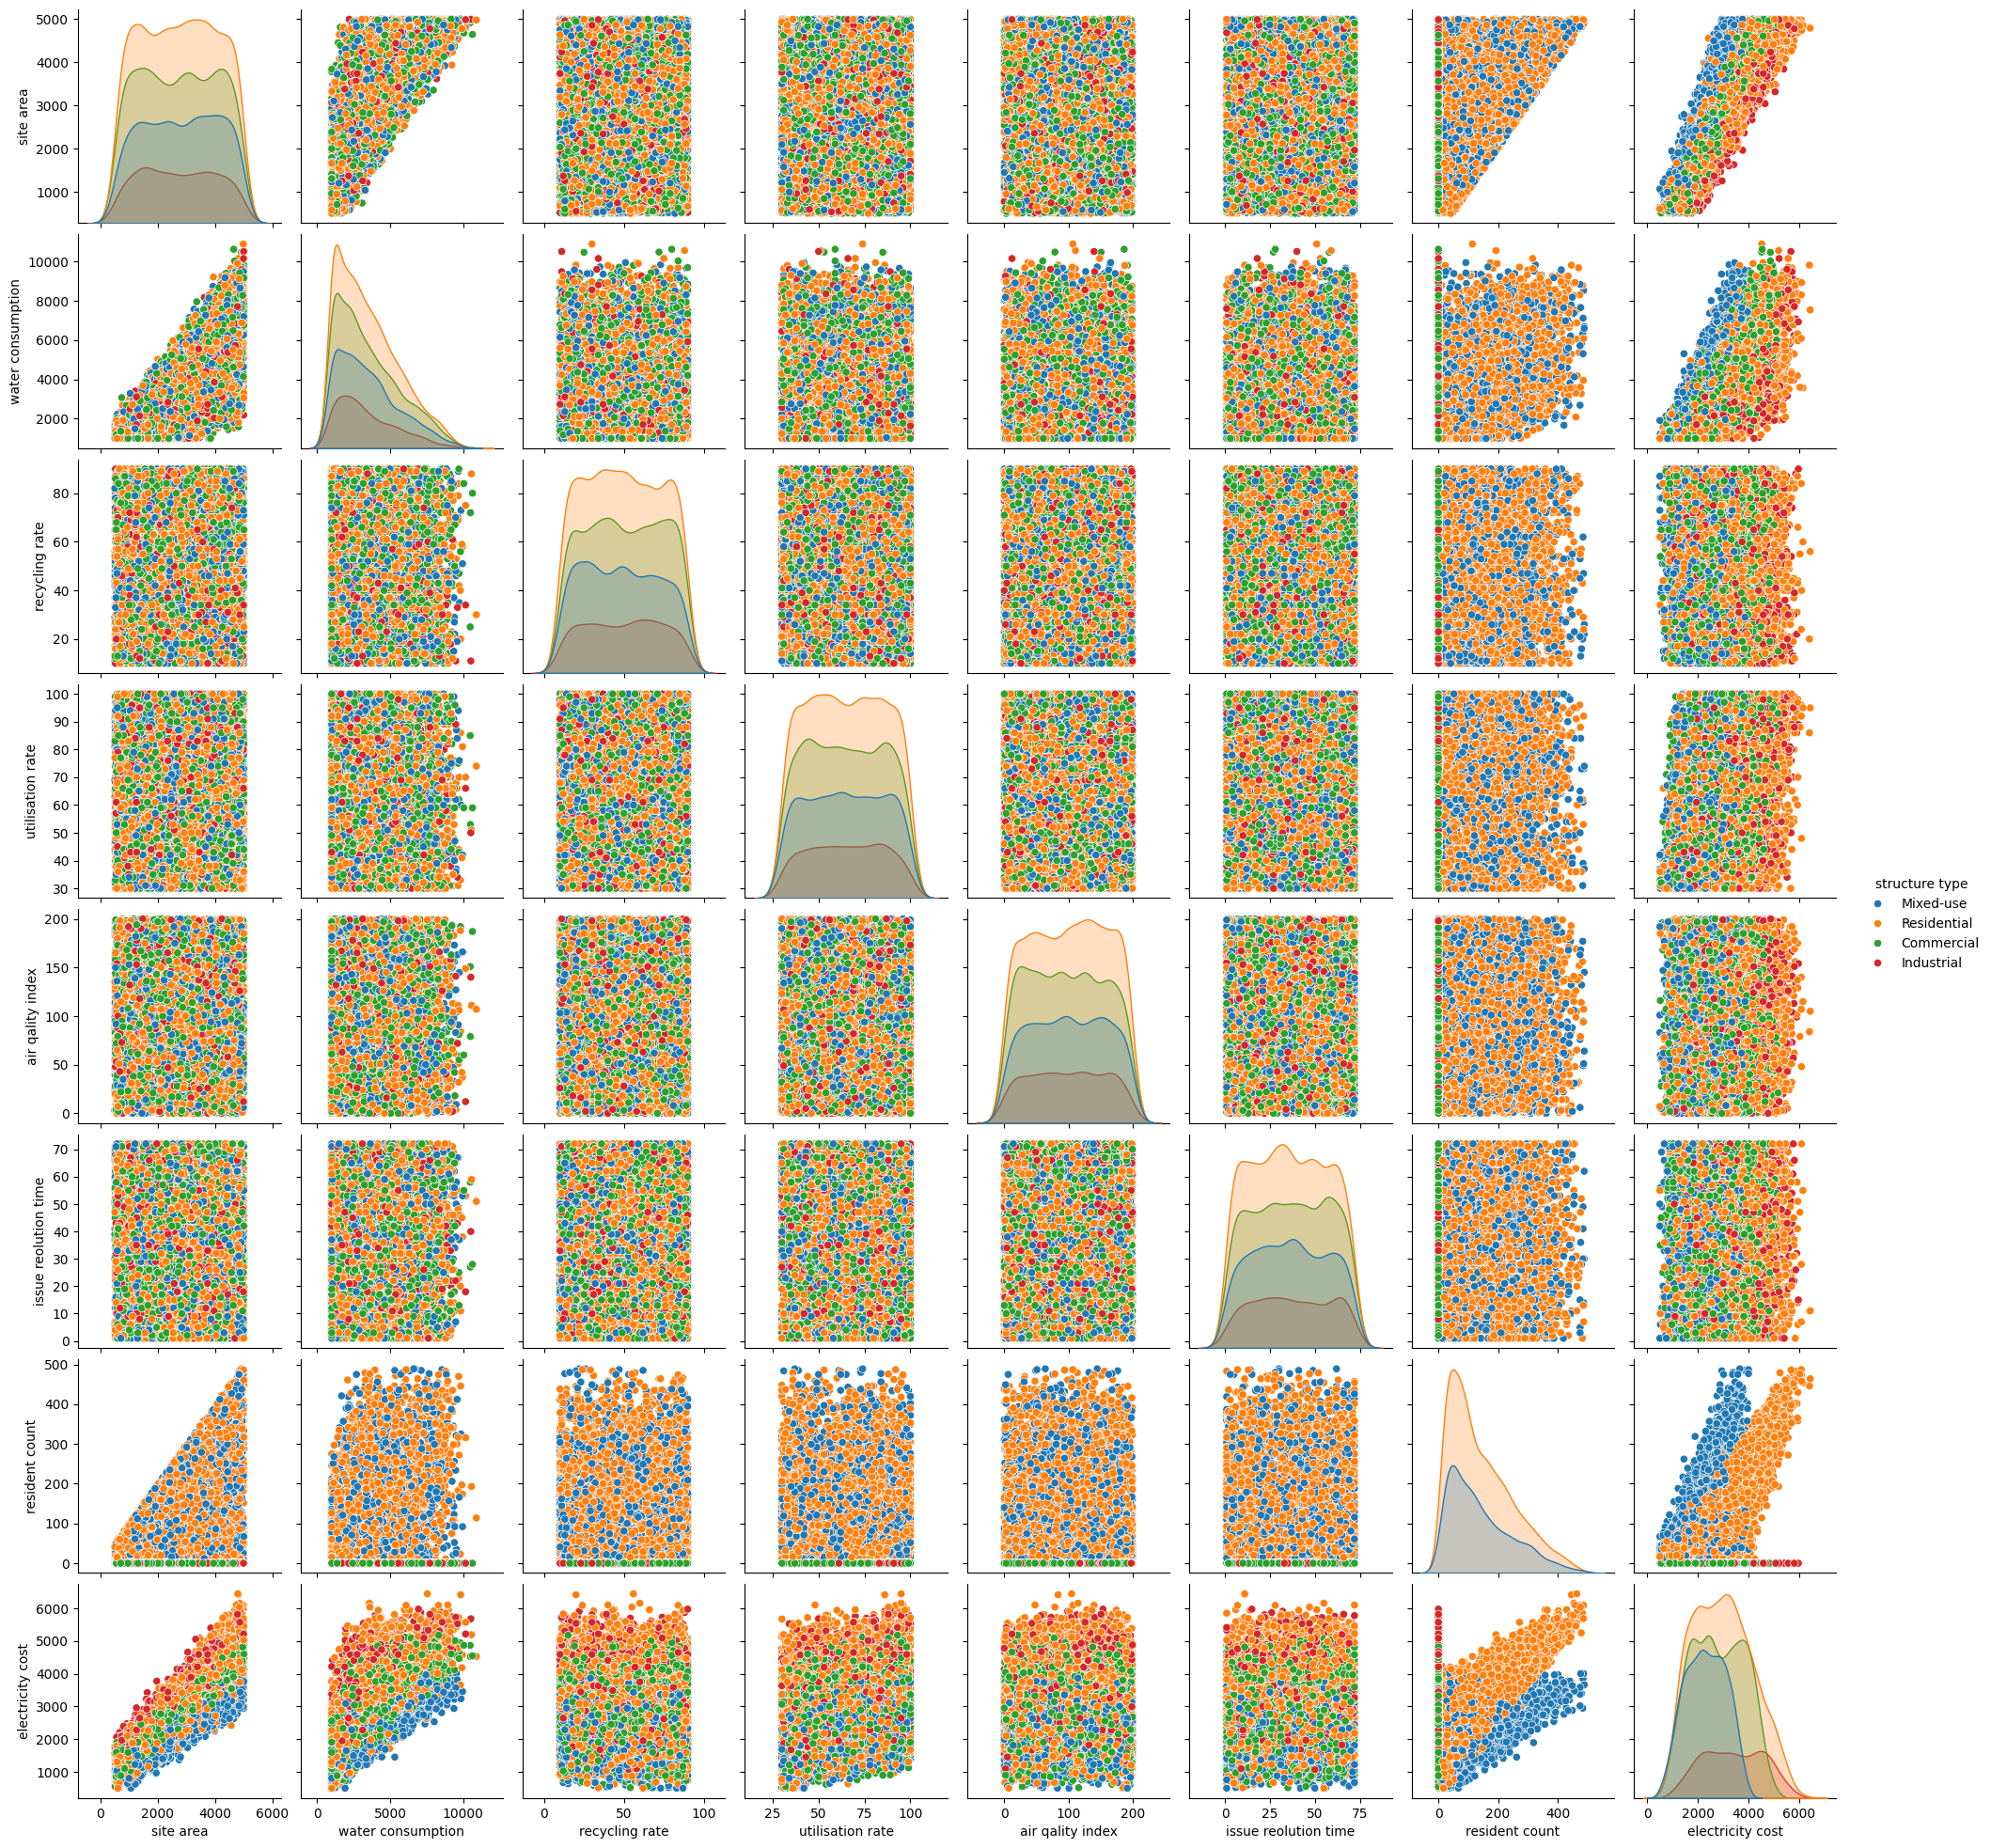

In [137]:
sns.pairplot(df,hue='structure type')

### Conclusions Derived here:-

 water consumption,resident count somewhat linearly dependent on site area
 electricity cost is much more linearly dependent on site area AND electricity cost order is Industrial > residencial >= commercial > Mixed for a giver site area

 site area and electricity cost LD on water consumption

 site area LD on resident count as well

 electricity cost for resident count in zero in industrial and commercial area


In [142]:
df[(df['site area'] > 4700) & (df['water consumption']< 1900)]

site area structure type  water consumption  recycling rate  \
2488       4774      Mixed-use             1869.0              50   
7335       4811     Commercial             1586.0              28   
8108       4809    Residential             1809.0              27   

      utilisation rate  air qality index  issue reolution time  \
2488                78               165                    40   
7335                65                10                     3   
8108                32                94                    51   

      resident count  electricity cost  
2488             221            3305.0  
7335               0            4101.0  
8108              94            3259.0

In [143]:
df.describe()

site area  water consumption  recycling rate  utilisation rate  \
count  10000.000000       10000.000000    10000.000000      10000.000000   
mean    2757.775100        3494.057100       49.598000         64.842200   
std     1293.059959        2076.181117       23.430141         20.432965   
min      501.000000        1000.000000       10.000000         30.000000   
25%     1624.000000        1779.000000       29.750000         47.000000   
50%     2773.500000        3047.500000       49.000000         65.000000   
75%     3874.000000        4811.000000       70.000000         83.000000   
max     5000.000000       10894.000000       90.000000        100.000000   

       air qality index  issue reolution time  resident count  \
count      10000.000000          10000.000000    10000.000000   
mean          99.468600             36.402600       85.573100   
std           58.014526             20.623905      107.876179   
min            0.000000              1.000000        0.000000   
25%           49.000000             19.000000        0.000000   
50%          100.000000             36.000000       39.000000   
75%          150.000000             54.000000      142.000000   
max          200.000000             72.000000      489.000000   

       electricity cost  
count      10000.000000  
mean        2837.845000  
std         1106.997441  
min          500.000000  
25%         1954.000000  
50%         2760.000000  
75%         3632.000000  
max         6446.000000

 after careful examination, we will now proceed with standardization!

In [148]:

num_cols = ['site area','water consumption','recycling rate','utilisation rate',
            'air qality index','issue reolution time','resident count','electricity cost']
cat_cols = ['structure type']

# Creating sub-pipelines
num_cols_without_skewed = [col for col in num_cols if col != 'water consumption']

numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

skewed_pipeline = Pipeline(steps=[
    ('yeojohnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols_without_skewed),
    ('skewed', skewed_pipeline, ['water consumption']),
    ('cat', categorical_pipeline, cat_cols)
])

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['site area', 'recycling rate',
                                  'utilisation rate', 'air qality index',
                                  'issue reolution time', 'resident count',
                                  'electricity cost']),
                                ('skewed',
                                 Pipeline(steps=[('yeojohnson',
                                                  PowerTransformer()),
                                                 ('scaler', StandardScaler())]),
                                 ['water consumption']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['structure type'])])

In [ ]:

ss= StandardScaler( )

exclude =['structure type']
include=[col for col in df.columns if col not in exclude]

df_copy = df.copy()
df[include] = ss.fit_transform(df[include])

In [89]:
df

site area structure type  water consumption  recycling rate  \
0     -1.081036      Mixed-use          -0.469663        0.828120   
1      1.171099      Mixed-use          -0.563590        0.017158   
2      0.645188      Mixed-use          -0.381998       -1.263308   
3     -1.385755    Residential          -1.201332       -1.562083   
4      1.676901    Residential           1.202240       -1.135261   
...         ...            ...                ...             ...   
9995  -1.585292     Commercial          -1.025519        1.126896   
9996   0.156400    Residential          -0.078059       -1.177943   
9997   0.915877     Commercial          -0.513978        0.486662   
9998   0.350523     Commercial           0.551493        0.956167   
9999   0.061272     Commercial          -0.178248        0.017158   

      utilisation rate  air qality index  issue reolution time  \
0            -0.628535          1.526098             -1.716667   
1             0.546096          1.129625              1.386684   
2             1.427069          1.698477              0.125948   
3            -0.236992         -0.439026             -1.619687   
4             0.007723         -1.163019              0.998765   
...                ...               ...                   ...   
9995          0.595039         -1.335398             -0.649890   
9996          0.350324          0.009160              0.513866   
9997         -1.069022         -0.887212              0.610846   
9998          0.399267          0.095350              0.901785   
9999         -0.383821         -1.662918             -1.280258   

      resident count  electricity cost  
0          -0.125827         -1.280866  
1           1.626269          0.415699  
2           0.291338          0.250379  
3          -0.468830         -1.140841  
4           0.921722          1.321799  
...              ...               ...  
9995       -0.793293         -1.764180  
9996       -0.292694          0.219664  
9997       -0.793293          0.440091  
9998       -0.793293          0.048923  
9999       -0.793293         -0.212157  

[10000 rows x 9 columns]

In [90]:
df_copy

site area structure type  water consumption  recycling rate  \
0          1360      Mixed-use             2519.0              69   
1          4272      Mixed-use             2324.0              50   
2          3592      Mixed-use             2701.0              20   
3           966    Residential             1000.0              13   
4          4926    Residential             5990.0              23   
...         ...            ...                ...             ...   
9995        708     Commercial             1365.0              76   
9996       2960    Residential             3332.0              22   
9997       3942     Commercial             2427.0              61   
9998       3211     Commercial             4639.0              72   
9999       2837     Commercial             3124.0              50   

      utilisation rate  air qality index  issue reolution time  \
0                   52               188                     1   
1                   76               165                    65   
2                   94               198                    39   
3                   60                74                     3   
4                   65                32                    57   
...                ...               ...                   ...   
9995                77                22                    23   
9996                72               100                    47   
9997                43                48                    49   
9998                73               105                    55   
9999                57                 3                    10   

      resident count  electricity cost  
0                 72            1420.0  
1                261            3298.0  
2                117            3115.0  
3                 35            1575.0  
4                185            4301.0  
...              ...               ...  
9995               0             885.0  
9996              54            3081.0  
9997               0            3325.0  
9998               0            2892.0  
9999               0            2603.0  

[10000 rows x 9 columns]

<Axes: ylabel='Frequency'>

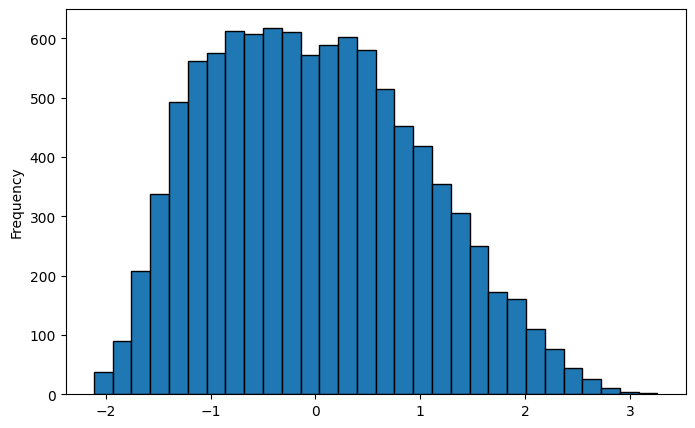

In [91]:
df['electricity cost'].plot(kind='hist', bins=30, edgecolor='black', figsize=(8, 5))

In [ ]:

ohe = OneHotEncoder(sparse_output=False,drop='first')

encoded = ohe.fit_transform(df[['structure type']])
encoded_df = pd.DataFrame( encoded, columns=ohe.get_feature_names_out(['structure type']) )

encoded_df

structure type_Commercial  structure type_Industrial  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
9995                        1.0                        0.0   
9996                        0.0                        0.0   
9997                        1.0                        0.0   
9998                        1.0                        0.0   
9999                        1.0                        0.0   

      structure type_Mixed-use  structure type_Residential  
0                          1.0                         0.0  
1                          1.0                         0.0  
2                          1.0                         0.0  
3                          0.0                         1.0  
4                          0.0                         1.0  
...                        ...                         ...  
9995                       0.0                         0.0  
9996                       0.0                         1.0  
9997                       0.0                         0.0  
9998                       0.0                         0.0  
9999                       0.0                         0.0  

[10000 rows x 4 columns]

In [93]:
df = pd.concat([df.drop('structure type', axis=1) , encoded_df],axis=1)

In [94]:
df

site area  water consumption  recycling rate  utilisation rate  \
0     -1.081036          -0.469663        0.828120         -0.628535   
1      1.171099          -0.563590        0.017158          0.546096   
2      0.645188          -0.381998       -1.263308          1.427069   
3     -1.385755          -1.201332       -1.562083         -0.236992   
4      1.676901           1.202240       -1.135261          0.007723   
...         ...                ...             ...               ...   
9995  -1.585292          -1.025519        1.126896          0.595039   
9996   0.156400          -0.078059       -1.177943          0.350324   
9997   0.915877          -0.513978        0.486662         -1.069022   
9998   0.350523           0.551493        0.956167          0.399267   
9999   0.061272          -0.178248        0.017158         -0.383821   

      air qality index  issue reolution time  resident count  \
0             1.526098             -1.716667       -0.125827   
1             1.129625              1.386684        1.626269   
2             1.698477              0.125948        0.291338   
3            -0.439026             -1.619687       -0.468830   
4            -1.163019              0.998765        0.921722   
...                ...                   ...             ...   
9995         -1.335398             -0.649890       -0.793293   
9996          0.009160              0.513866       -0.292694   
9997         -0.887212              0.610846       -0.793293   
9998          0.095350              0.901785       -0.793293   
9999         -1.662918             -1.280258       -0.793293   

      electricity cost  structure type_Commercial  structure type_Industrial  \
0            -1.280866                        0.0                        0.0   
1             0.415699                        0.0                        0.0   
2             0.250379                        0.0                        0.0   
3            -1.140841                        0.0                        0.0   
4             1.321799                        0.0                        0.0   
...                ...                        ...                        ...   
9995         -1.764180                        1.0                        0.0   
9996          0.219664                        0.0                        0.0   
9997          0.440091                        1.0                        0.0   
9998          0.048923                        1.0                        0.0   
9999         -0.212157                        1.0                        0.0   

      structure type_Mixed-use  structure type_Residential  
0                          1.0                         0.0  
1                          1.0                         0.0  
2                          1.0                         0.0  
3                          0.0                         1.0  
4                          0.0                         1.0  
...                        ...                         ...  
9995                       0.0                         0.0  
9996                       0.0                         1.0  
9997                       0.0                         0.0  
9998                       0.0                         0.0  
9999                       0.0                         0.0  

[10000 rows x 12 columns]

In [95]:
for col in df.columns:
    print(df[col].skew())

-0.00572215195398257
0.774430908081458
0.02242535830481317
0.00464524016359734
-0.004155039696468184
0.006187666532084268
1.3130396197838912
0.30103309038794424
0.8704061478592133
2.659677915770344
1.4601753721103767
0.4343555738284639


skewness of water consumption:  0.774430908081458


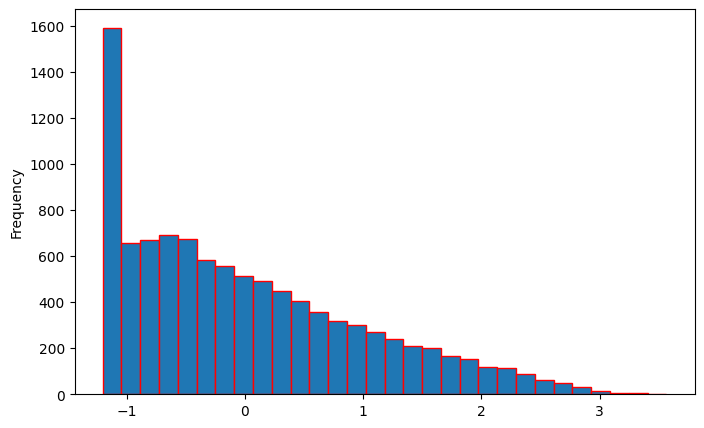

In [96]:
df['water consumption'].plot(kind='hist', bins=30, edgecolor='red' , figsize=(8,5))
print("skewness of water consumption: ", df['water consumption'].skew() )

### right skewness remains, harmfull for regression models, therefore needs to be eleminated.
### method - log1p transfromation

In [97]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # This works with negatives too!
df[['water consumption']] = pt.fit_transform(df[['water consumption']])

skewness of water consumption:  0.12236872626451653


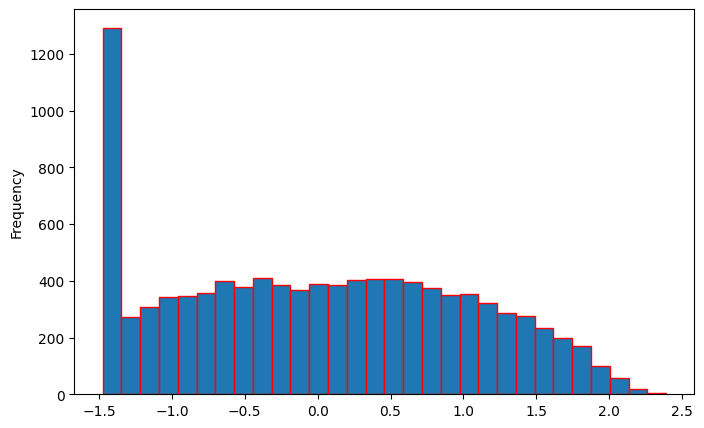

In [98]:
df['water consumption'].plot(kind='hist', bins=30, edgecolor='red' , figsize=(8,5))
print("skewness of water consumption: ", df['water consumption'].skew() )

skewness of water consumption:  0.12236872626451653


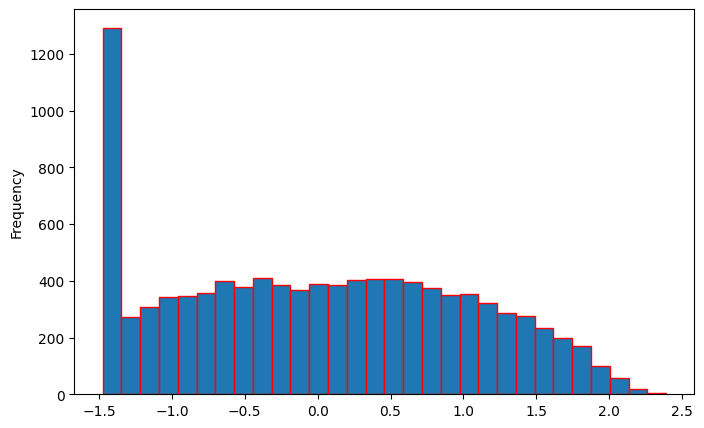

In [100]:
df['water consumption'].plot(kind='hist', bins=30, edgecolor='red' , figsize=(8,5))
print("skewness of water consumption: ", df['water consumption'].skew() )

### all set to move to model training!

In [101]:
x= df.iloc[: , [0,1,2,3,4,5,6,8,9,10,11]]
y=df.iloc[:,7]
x

site area  water consumption  recycling rate  utilisation rate  \
0     -1.081036          -0.341038        0.828120         -0.628535   
1      1.171099          -0.470397        0.017158          0.546096   
2      0.645188          -0.224893       -1.263308          1.427069   
3     -1.385755          -1.475235       -1.562083         -0.236992   
4      1.676901           1.199814       -1.135261          0.007723   
...         ...                ...             ...               ...   
9995  -1.585292          -1.177030        1.126896          0.595039   
9996   0.156400           0.141915       -1.177943          0.350324   
9997   0.915877          -0.401442        0.486662         -1.069022   
9998   0.350523           0.732663        0.956167          0.399267   
9999   0.061272           0.027330        0.017158         -0.383821   

      air qality index  issue reolution time  resident count  \
0             1.526098             -1.716667       -0.125827   
1             1.129625              1.386684        1.626269   
2             1.698477              0.125948        0.291338   
3            -0.439026             -1.619687       -0.468830   
4            -1.163019              0.998765        0.921722   
...                ...                   ...             ...   
9995         -1.335398             -0.649890       -0.793293   
9996          0.009160              0.513866       -0.292694   
9997         -0.887212              0.610846       -0.793293   
9998          0.095350              0.901785       -0.793293   
9999         -1.662918             -1.280258       -0.793293   

      structure type_Commercial  structure type_Industrial  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
9995                        1.0                        0.0   
9996                        0.0                        0.0   
9997                        1.0                        0.0   
9998                        1.0                        0.0   
9999                        1.0                        0.0   

      structure type_Mixed-use  structure type_Residential  
0                          1.0                         0.0  
1                          1.0                         0.0  
2                          1.0                         0.0  
3                          0.0                         1.0  
4                          0.0                         1.0  
...                        ...                         ...  
9995                       0.0                         0.0  
9996                       0.0                         1.0  
9997                       0.0                         0.0  
9998                       0.0                         0.0  
9999                       0.0                         0.0  

[10000 rows x 11 columns]

In [102]:
y

0      -1.280866
1       0.415699
2       0.250379
3      -1.140841
4       1.321799
          ...   
9995   -1.764180
9996    0.219664
9997    0.440091
9998    0.048923
9999   -0.212157
Name: electricity cost, Length: 10000, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [104]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
importances = model.feature_importances_

for col,importance in zip(x_train.columns, model.feature_importances_):
    print(f"{col} : {importance: .4}") 

   

site area :  0.3592
water consumption :  0.008089
recycling rate :  0.002326
utilisation rate :  0.02692
air qality index :  0.002571
issue reolution time :  0.003159
resident count :  0.04921
structure type_Commercial :  0.00909
structure type_Industrial :  0.1886
structure type_Mixed-use :  0.3383
structure type_Residential :  0.01252


In [105]:
#cant even remove any feature here....
#NOW model training and accuracy inspection!

### regrssion model:

### we are going with StackingRegressor as I want to not just use multiple Regressor models which will prevent overfitting and give a better accuracy but also to use XGBRegressor which will definitely help it predict even better!

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

In [106]:
base_models = [ 
    ('lr' , LinearRegression()),
    ('svr' , SVR()),
    ('rf' , RandomForestRegressor()),
    ('knn' , KNeighborsRegressor())
]

meta_model = XGBRegressor()

In [109]:
stack_model = StackingRegressor(estimators = base_models , final_estimator = meta_model)

stack_model.fit(x_train,y_train)
y_pred = stack_model.predict(x_test)



In [115]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,y_test)
r2

0.9610486509983373

In [120]:
lrr = LinearRegression()
rff = RandomForestRegressor()
xgbb = XGBRegressor()
svrr=SVR()
k=KNeighborsRegressor()

lrr.fit(x_train,y_train)
y_pred2 = lrr.predict(x_test)
r21=r2_score(y_pred2,y_test)
print(r21)

rff.fit(x_train,y_train)
y_pred3 = rff.predict(x_test)
r22=r2_score(y_pred3,y_test)
print(r22)

xgbb.fit(x_train,y_train)
y_pred4 = xgbb.predict(x_test)
r23=r2_score(y_pred4,y_test)
print(r23)

svrr.fit(x_train,y_train)
y_pred5 = svrr.predict(x_test)
r24=r2_score(y_pred5,y_test)
print(r24)

k.fit(x_train,y_train)
y_pred6 = k.predict(x_test)
r25=r2_score(y_pred6,y_test)
print(r25)



0.9153816171058211
0.9591497557019082
0.9571717145659153
0.9640341626695025
0.9244412762945882


### The best r2 score seems to belong to SVR and XGB individually

Now trying stackingRegressor on them

In [125]:
new_base_models = [ 
    ('svr' , SVR()),
    ('xgb' , XGBRegressor())
]

stack_model = StackingRegressor(estimators = new_base_models , final_estimator = meta_model)

stack_model.fit(x_train,y_train)




StackingRegressor(estimators=[('svr', SVR()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            inter...
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None, ...))

In [126]:
y_predicted = stack_model.predict(x_test)

new_r2 = r2_score(y_predicted,y_test)
new_r2

0.9612144356378938

### here we get a robust model which has an r2_score 0.4 % less than what SVR was providing!

Lastly, trying SVR in the meta model too... 

In [128]:
new_base_models = [ 
    ('svr' , SVR()),
    ('xgb' , XGBRegressor())
]

new_meta_model = SVR()

stack_model = StackingRegressor(estimators = new_base_models , final_estimator = new_meta_model)

stack_model.fit(x_train,y_train)


StackingRegressor(estimators=[('svr', SVR()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=SVR())

In [129]:

y_predicted = stack_model.predict(x_test)

new_r2 = r2_score(y_predicted,y_test)
new_r2

0.964593570836752

### And Here We Have The HIghest R2 score till now!  96.46!!

all thats left is to now create a fast api and deploy it on the AWS